In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [4]:
plt.rc('font', family='NanumBarunGothic')

In [5]:
path = '/content/drive/MyDrive/data/programmers_ai/week7/'

In [6]:
raw_data = pd.read_csv(os.path.join(path, 'delivery_raw.csv'), sep='\t')
raw_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [8]:
raw_data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


* 결측값 칼럼들
* market_id: 지역(배달이 이루어지는 도시) 아이디
* actualactual_delivery_time: 주문자가 배달 받은 시간
* store_primary_category: 식당 카테고리
* order_protocol: 주문을 받을 수 있는 방식을 나타내는 아이디
* total_onshift: 주문이 생성되었을 때 가게로부터 10마일 이내에 있는 배달원 수
* total_busy: 주문에 관여하고 있는 배달원 수
* total_outstanding_orders: 주문한 가게로부터 10마일 이내에 있는 다른 주문들의 수
* estimated_store_to_consumer_driving_duration: target 값

# feature별 결측값 처리
* market_id, actual_delivery_time, estimated_store_to_consumer_driving_duration => 삭제(Done)
* store_primary_category => 삭제(Done)
* order_protocol => IQR 50 (Done)
* total_onshift => 음수 clip, IQR 50 (Done)
* total_busy => 음수 clip, IQR 50 (Done)
* total_outstanding_orders => 음수 clip, IQR50 (Done)

In [9]:
raw_data[raw_data['actual_delivery_time'].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
109,3.0,2015-02-10 21:51:54,NaN,1698,sandwich,3.0,1,1125,1,975,975,7.0,5.0,4.0,251,488.0
7670,2.0,2015-02-08 02:54:42,NaN,2340,japanese,2.0,4,2860,3,390,690,131.0,123.0,197.0,251,723.0
78511,4.0,2015-02-15 02:15:45,NaN,901,catering,1.0,9,5050,6,375,1125,91.0,75.0,167.0,446,770.0
115982,4.0,2015-02-16 01:52:49,NaN,1107,pizza,3.0,2,2094,2,599,1195,53.0,53.0,102.0,251,433.0
140635,2.0,2015-02-15 02:21:42,NaN,1661,dessert,1.0,3,4210,3,865,1850,123.0,91.0,176.0,446,862.0
158967,2.0,2015-02-01 01:21:29,NaN,314,mexican,5.0,5,3447,3,225,1349,90.0,88.0,109.0,251,572.0
170416,5.0,2015-02-01 01:36:33,NaN,2651,fast,4.0,3,982,3,165,575,41.0,31.0,31.0,251,333.0


In [10]:
# actual_delivery_time이 없는 경우는 삭제 => 예측 불가하다 판단 + estimated_store_to_consumer_driving_duration 삭제
raw_data = raw_data.dropna(subset=['market_id', 'store_primary_category', 'actual_delivery_time', 'estimated_store_to_consumer_driving_duration'])

In [11]:
raw_data = raw_data.reset_index()

In [12]:
raw_data.head()

,index,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
3,14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
4,15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0


In [13]:
raw_data.drop('index', axis=1, inplace=True)
raw_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0


In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     191652 non-null  float64
 1   created_at                                    191652 non-null  object 
 2   actual_delivery_time                          191652 non-null  object 
 3   store_id                                      191652 non-null  int64  
 4   store_primary_category                        191652 non-null  object 
 5   order_protocol                                191407 non-null  float64
 6   total_items                                   191652 non-null  int64  
 7   subtotal                                      191652 non-null  int64  
 8   num_distinct_items                            191652 non-null  int64  
 9   min_item_price                                19

In [15]:
raw_data[raw_data['market_id'].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration


In [16]:
# 데이터 입력과정중에 오류가 있어보임. null값 내용 검색해 맞춰주기
raw_data[raw_data['store_id'] == 1148]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
537,2.0,2015-02-07 03:36:31,2015-02-07 04:29:38,1148,indian,3.0,3,3400,3,1000,1400,57.0,57.0,113.0,251,693.0
538,2.0,2015-02-12 02:14:05,2015-02-12 02:53:25,1148,indian,3.0,3,1700,2,250,1200,61.0,61.0,81.0,251,773.0
539,2.0,2015-02-14 03:27:12,2015-02-14 04:10:55,1148,indian,3.0,1,1200,1,1200,1200,58.0,56.0,114.0,251,619.0
540,2.0,2015-01-30 01:39:47,2015-01-30 02:25:13,1148,indian,3.0,3,3400,2,1000,1200,46.0,42.0,52.0,251,766.0
541,2.0,2015-01-28 04:02:55,2015-01-28 04:49:42,1148,indian,3.0,2,2400,2,1200,1200,45.0,34.0,43.0,251,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,2.0,2015-02-05 03:17:25,2015-02-05 03:49:21,1148,indian,3.0,1,1200,1,1200,1200,60.0,59.0,90.0,251,469.0
953,2.0,2015-02-16 03:12:54,2015-02-16 03:51:11,1148,indian,3.0,2,2200,2,1000,1200,47.0,47.0,101.0,251,653.0
954,2.0,2015-02-12 02:50:44,2015-02-12 03:19:22,1148,indian,3.0,2,1550,2,350,1200,62.0,52.0,86.0,251,440.0
955,2.0,2015-02-16 02:22:53,2015-02-16 03:15:28,1148,indian,3.0,4,3300,2,450,1200,56.0,53.0,92.0,251,664.0


In [17]:
raw_data[raw_data['store_id'] == 1148]['market_id'].value_counts()

2.0    83
5.0     2
6.0     1
Name: market_id, dtype: int64

In [18]:
raw_data[raw_data['store_id'] == 1148]['store_primary_category'].value_counts()

indian           82
seafood           1
thai              1
japanese          1
mediterranean     1
Name: store_primary_category, dtype: int64

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     191652 non-null  float64
 1   created_at                                    191652 non-null  object 
 2   actual_delivery_time                          191652 non-null  object 
 3   store_id                                      191652 non-null  int64  
 4   store_primary_category                        191652 non-null  object 
 5   order_protocol                                191407 non-null  float64
 6   total_items                                   191652 non-null  int64  
 7   subtotal                                      191652 non-null  int64  
 8   num_distinct_items                            191652 non-null  int64  
 9   min_item_price                                19

In [20]:
# 음수값들 0으로 맞춰주기
for col in ['total_onshift', 'total_busy', 'total_outstanding_orders']:
  raw_data.loc[raw_data[col] < 0, col] = 0

In [21]:
# IQR50 처리
for col in ['order_protocol', 'total_onshift', 'total_busy', 'total_outstanding_orders']:
  median = raw_data[col].median()
  raw_data[col].fillna(median, inplace=True)

In [22]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     191652 non-null  float64
 1   created_at                                    191652 non-null  object 
 2   actual_delivery_time                          191652 non-null  object 
 3   store_id                                      191652 non-null  int64  
 4   store_primary_category                        191652 non-null  object 
 5   order_protocol                                191652 non-null  float64
 6   total_items                                   191652 non-null  int64  
 7   subtotal                                      191652 non-null  int64  
 8   num_distinct_items                            191652 non-null  int64  
 9   min_item_price                                19

In [23]:
raw_data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,2.971876,3539.897283,2.898117,3.193747,2680.358728,2.668535,685.748946,1158.548332,44.274925,41.302595,56.826988,307.486971,545.508656
std,1.523258,2051.461745,1.500796,2.668185,1822.558430,1.628741,520.410736,557.252912,33.177410,30.886005,50.754960,89.586539,219.431411
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1694.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,19.000000,17.000000,19.000000,251.000000,382.000000
50%,3.000000,3599.500000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000
75%,4.000000,5302.000000,4.000000,4.000000,3394.000000,3.000000,949.000000,1395.000000,62.000000,60.000000,80.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


* 범주: market_id, order_protocol, store_primary_category
* 나머지는 수치형

# EDA

In [24]:
from tqdm.notebook import tqdm
# target값 생성
# actual_delivery_time, created_at을 datetime으로 변환한 후
# 두 시간 차이를 초로 환산해서 target이라는 필드값을 새로 생성한다.
target = []
for row in tqdm(raw_data.iterrows()):
  start = pd.to_datetime(row[1]['created_at'], utc=True)
  end = pd.to_datetime(row[1]['actual_delivery_time'], utc=True)

  # 두 시간의 차이 계산 및 초로 환산
  time_difference = (end - start).total_seconds()
  target.append(time_difference)

raw_data['target'] = target

0it [00:00, ?it/s]

In [40]:
raw_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0
4,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0


In [30]:
# 주문들어온 시간대 => 새로운 feature 생성 => c_hour
raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['c_hour'] = raw_data['created_at'].dt.hour

In [31]:
raw_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target,c_hour
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,22
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,21
2,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,3
4,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,2


In [32]:
raw_data.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

In [35]:
# raw_data.to_csv(os.path.join(path, 'my_raw_data.csv'), index=False)

<Axes: xlabel='market_id', ylabel='target'>

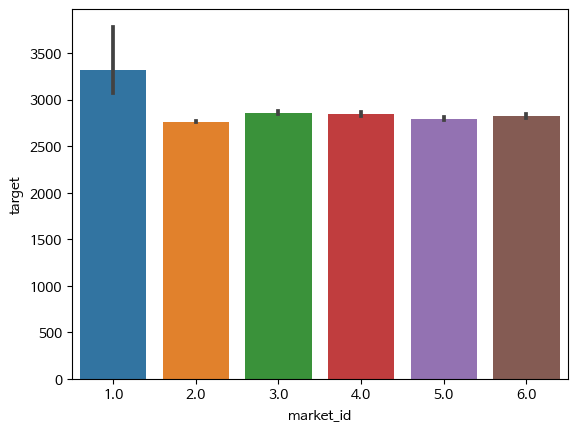

In [36]:
# market_id, target
sns.barplot(x='market_id', y='target', data=raw_data)

# https://www.inflearn.com/questions/124782/sns-barplot-%EC%9D%98-%EA%B2%B0%EA%B3%BC-%EA%B7%B8%EB%9E%98%ED%94%84-%ED%95%B4%EC%84%9D
# https://chioni.github.io/posts/bootstrap/

market_id = 1 인 케이스에 다른 지역 id에 비해 오래 걸린다는 특징을 알 수 있음.

<Axes: xlabel='order_protocol', ylabel='target'>

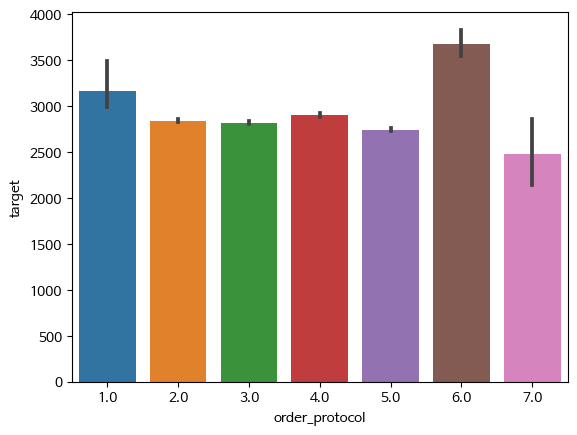

In [37]:
# order_protocol, target
sns.barplot(x='order_protocol', y='target', data=raw_data)

* order_protocol의 경우 6번일때 배달이 오래 걸린다는것을 알 수 있음.

In [38]:
# store_primary_category, target
raw_data['store_primary_category'].value_counts()

american             19304
pizza                17236
mexican              17011
burger               10907
sandwich              9981
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

In [39]:
raw_data['store_primary_category'].unique()

array(['american', 'mexican', 'indian', 'italian', 'sandwich', 'thai',
       'cafe', 'salad', 'pizza', 'chinese', 'singaporean', 'burger',
       'breakfast', 'mediterranean', 'japanese', 'greek', 'catering',
       'filipino', 'convenience-store', 'other', 'korean', 'vegan',
       'asian', 'barbecue', 'fast', 'dessert', 'smoothie', 'seafood',
       'vietnamese', 'cajun', 'steak', 'middle-eastern', 'soup',
       'vegetarian', 'persian', 'nepalese', 'sushi', 'latin-american',
       'hawaiian', 'chocolate', 'burmese', 'british', 'pasta', 'alcohol',
       'dim-sum', 'peruvian', 'turkish', 'malaysian', 'ethiopian',
       'afghan', 'bubble-tea', 'german', 'french', 'caribbean',
       'gluten-free', 'comfort-food', 'gastropub', 'pakistani',
       'moroccan', 'spanish', 'southern', 'tapas', 'russian', 'brazilian',
       'european', 'cheese', 'african', 'argentine', 'kosher', 'irish',
       'lebanese', 'belgian', 'indonesian', 'alcohol-plus-food'],
      dtype=object)

In [40]:
raw_data['store_primary_category'].value_counts()[:30]

american          19304
pizza             17236
mexican           17011
burger            10907
sandwich           9981
chinese            9383
japanese           9153
dessert            8733
fast               7324
indian             7287
thai               7193
italian            7146
vietnamese         6062
mediterranean      5487
breakfast          5386
other              3967
salad              3720
greek              3307
seafood            2713
barbecue           2709
asian              2439
cafe               2210
sushi              2179
alcohol            1838
korean             1805
smoothie           1636
catering           1624
middle-eastern     1491
hawaiian           1491
dim-sum            1104
Name: store_primary_category, dtype: int64

In [41]:
top_30_category = list(raw_data['store_primary_category'].value_counts().index[:30])
top_30_category

['american',
 'pizza',
 'mexican',
 'burger',
 'sandwich',
 'chinese',
 'japanese',
 'dessert',
 'fast',
 'indian',
 'thai',
 'italian',
 'vietnamese',
 'mediterranean',
 'breakfast',
 'other',
 'salad',
 'greek',
 'seafood',
 'barbecue',
 'asian',
 'cafe',
 'sushi',
 'alcohol',
 'korean',
 'smoothie',
 'catering',
 'middle-eastern',
 'hawaiian',
 'dim-sum']

In [42]:
top_cat_df = raw_data[raw_data['store_primary_category'].isin(top_30_category)]

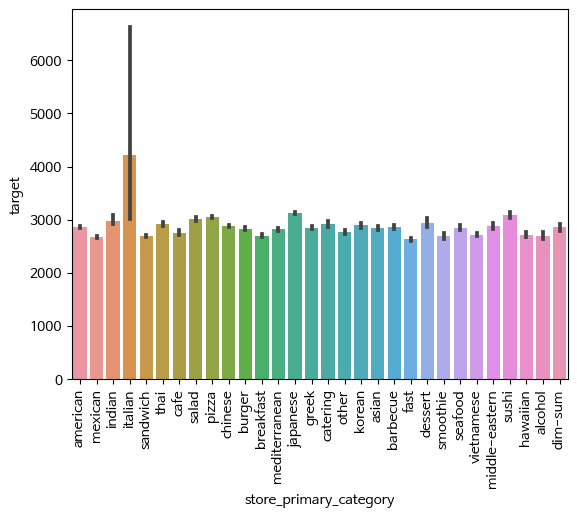

In [43]:
sns.barplot(x='store_primary_category', y='target', data=top_cat_df)
plt.tick_params(axis='x', rotation=90)
plt.show()

* 음식 카테고리의 경우 이탈리안 음식이 제일 오래 걸렸다.

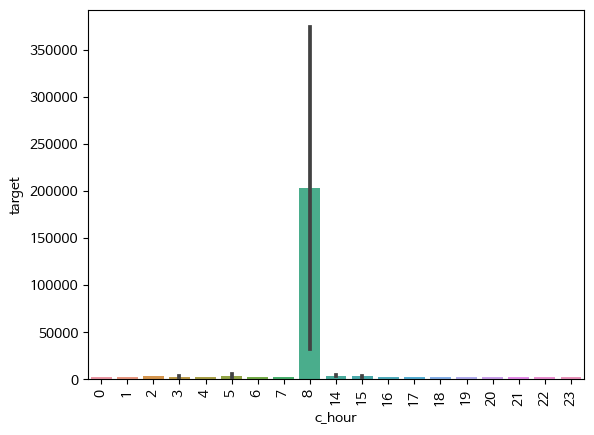

In [45]:
# c_hour, target
sns.barplot(x='c_hour', y='target', data=raw_data)
plt.tick_params(axis='x', rotation=90)
plt.show()

* c_hour가 top인 경우 두드러진 차이를 보인다.
* c_hour가 8인경우 is_peak_time이란 feature를 새로 생성하고 피크 타임일 경우 1 아닐 경우 0으로 둔다.

In [54]:
raw_data['is_peak_time'] = np.where(raw_data['c_hour'] == 8, 1, 0)

In [55]:
raw_data.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target,c_hour,is_peak_time
0,1.0,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,22,0
1,2.0,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,21,0
2,2.0,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0,0
3,1.0,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,3,0
4,1.0,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,2,0


In [56]:
raw_data['is_peak_time'].value_counts()

0    191650
1         2
Name: is_peak_time, dtype: int64